In [19]:
import tensorflow as tf
from tensorflow import keras

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
fashion_mnist=keras.datasets.fashion_mnist

In [22]:
(train_images,train_labels), (test_images,test_lables)=fashion_mnist.load_data()

In [23]:
class_names=['T-shirts/tops','Trousers','Pullover','Dresses','coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [24]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [25]:
train_labels[24]

4

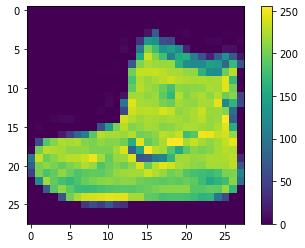

In [26]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [27]:
#scalling pixels btw 0 and 1
train_images=train_images / 255.0
test_images=test_images / 255.0

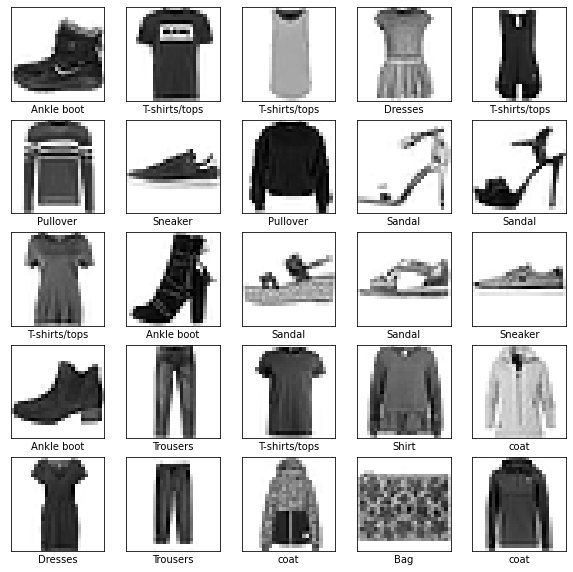

In [28]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Building the model

In [87]:
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                       keras.layers.Dense(128, activation=tf.nn.relu),
                       keras.layers.Dense(10, activation=tf.nn.softmax)
                       ])

In [88]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [89]:
model.fit(train_images, train_labels,epochs=15 )

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4982 - accuracy: 0.8251
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3747 - accuracy: 0.8637
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3350 - accuracy: 0.8786
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3137 - accuracy: 0.8840
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2956 - accuracy: 0.8901
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2801 - accuracy: 0.8953
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2684 - accuracy: 0.9003
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2587 - accuracy: 0.9021
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2488 - accuracy: 0.9064
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.238

In [90]:
#evaluating the accuracy with test data set
test_loss,test_acc=model.evaluate(test_images, test_lables)
print("Test accuracy=", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3548 - accuracy: 0.8858
Test accuracy= 0.8858000040054321


In [91]:
test_images[0].shape

(28, 28)

In [92]:
  predictions=model.predict(test_images)

In [93]:
predictions[0]

array([1.2835334e-08, 1.8984639e-11, 2.6302571e-11, 1.6833026e-12,
       5.0104418e-09, 2.0885409e-04, 4.2928782e-11, 1.0632022e-02,
       9.6368885e-12, 9.8915905e-01], dtype=float32)

In [94]:
np.argmax(prediction[0])

9

In [95]:
test_lables[0]

9

In [63]:
def plot_image(i,predictions_array,true_label,img):
 predictions_array,true_label,img=predictions_array[i],true_label[i], img[i]
 plt.grid(False)
 plt.xticks([])
 plt.yticks([])

 plt.imshow(img, cmap=plt.cm.binary)

 predicted_label=np.argmax(predictions_array)
 if predicted_label == true_label:
    color='blue'
 else:
    color='red'
    
 plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array),
                                     class_names[true_label]),color=color)

def plot_value_array(i,predictions_array,true_label):
    predictions_array,true_label=predictions_array[i],true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot=plt.bar(range(10),predictions_array,color="#777777")
    plt.ylim([0,1])
    predicted_label=np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')
    
    
    
    
    
            
 

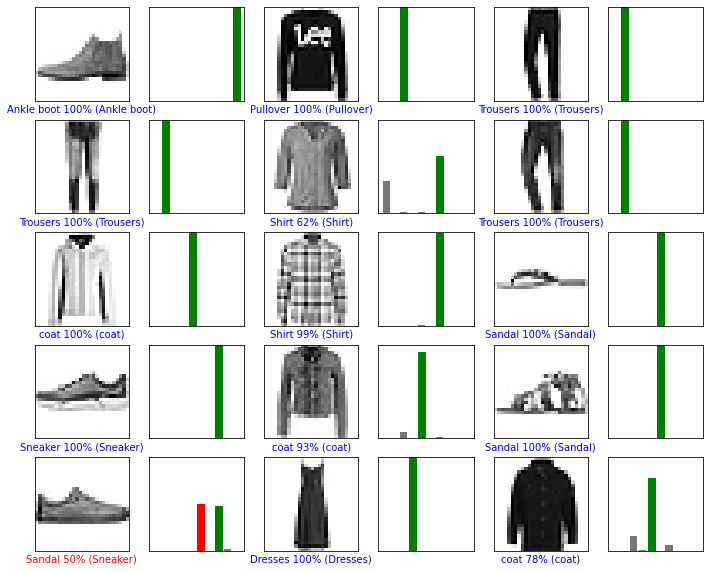

In [64]:
num_rows=5
num_cols=3
num_images=num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range (num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions,test_lables,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions,test_lables)
plt.show()
    
        
    
    

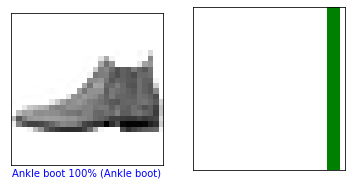

In [65]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_lables,test_images)
plt.subplot(1,2,2)    
plot_value_array(i,predictions,test_lables)
plt.show()

In [96]:
img=test_images[24]
print(img.shape)

(28, 28)


In [108]:
 n?img=(np.expand_dims(img,24))
      

SyntaxError: invalid syntax (<ipython-input-108-132150e16736>, line 1)

In [98]:
predictions_single=model.predict(img)
print(predictions_single)

[[1.6091826e-09 1.0000000e+00 4.8207174e-13 5.1294453e-09 5.4293386e-13
  4.8617822e-16 3.0899836e-12 1.0693701e-23 9.1554360e-15 5.8295299e-21]]


In [105]:
np.argmax(predictions_single)

1

In [106]:
test_lables[24]

1

([<matplotlib.axis.XTick at 0x228a450b040>,
 [Text(0, 0, 'T-shirts/tops'),
  Text(1, 0, 'Trousers'),
  Text(2, 0, 'Pullover'),
  Text(3, 0, 'Dresses'),
  Text(4, 0, 'coat'),
  Text(5, 0, 'Sandal'),
  Text(6, 0, 'Shirt'),
  Text(7, 0, 'Sneaker'),
  Text(8, 0, 'Bag'),
  Text(9, 0, 'Ankle boot')],
 [Text(0, 0, 'T-shirts/tops'),
  Text(1, 0, 'Trousers'),
  Text(2, 0, 'Pullover'),
  Text(3, 0, 'Dresses'),
  Text(4, 0, 'coat'),
  Text(5, 0, 'Sandal'),
  Text(6, 0, 'Shirt'),
  Text(7, 0, 'Sneaker'),
  Text(8, 0, 'Bag'),
  Text(9, 0, 'Ankle boot')],
 [Text(0, 0, 'T-shirts/tops'),
  Text(1, 0, 'Trousers'),
  Text(2, 0, 'Pullover'),
  Text(3, 0, 'Dresses'),
  Text(4, 0, 'coat'),
  Text(5, 0, 'Sandal'),
  Text(6, 0, 'Shirt'),
  Text(7, 0, 'Sneaker'),
  Text(8, 0, 'Bag'),
  Text(9, 0, 'Ankle boot')],
 [Text(0, 0, 'T-shirts/tops'),
  Text(1, 0, 'Trousers'),
  Text(2, 0, 'Pullover'),
  Text(3, 0, 'Dresses'),
  Text(4, 0, 'coat'),
  Text(5, 0, 'Sandal'),
  Text(6, 0, 'Shirt'),
  Text(7, 0, 'Sneaker')

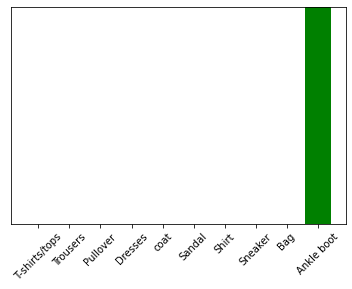

In [73]:
plot_value_array(0,predictions_single,test_lables)
_*plt.xticks(range(10),class_names,rotation=45)